In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 6.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=8471ba0ceb997ba43c68df8b2fe57836c5d013075a3e7ee83304090fdc94e246
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-z0f97ea4
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-z0f97ea4
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

!gcc --version

# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 715kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200622-cp36-none-any.whl size=41182 sha256=1839ba2d9a42eed3a208d216dce990d1d39e4dc901096b5785d2d4379bed8697
  Stored in directory: /root/.cache/pip/wheels/ed/12/91/133f4d4c09919f23f6d8fd7953884c79844bfb682e59259f31
Successfully built fvcore


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
%%time
!rm -r frames/*
!mkdir frames/

video = 'vid_short.mp4'

cap = cv2.VideoCapture(video)
cnt = 0

if(cap.isOpened == False):
  print('Error Opening the video')

  
ret, first_frame = cap.read()

while(cap.isOpened()):
  ret, frame = cap.read()

  if ret == True:
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt += 1
    if(cnt == 750):
      break
  
  else :
    break

rm: cannot remove 'frames/*': No such file or directory
CPU times: user 25.3 s, sys: 1.01 s, total: 26.3 s
Wall time: 31.6 s


In [ ]:
FPS = cap.get(cv2.CAP_PROP_FPS)
print(FPS)

24.0


In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:14, 9.46MB/s]                           


In [ ]:
img =  cv2.imread("frames/30.png")

outputs = predictor(img)

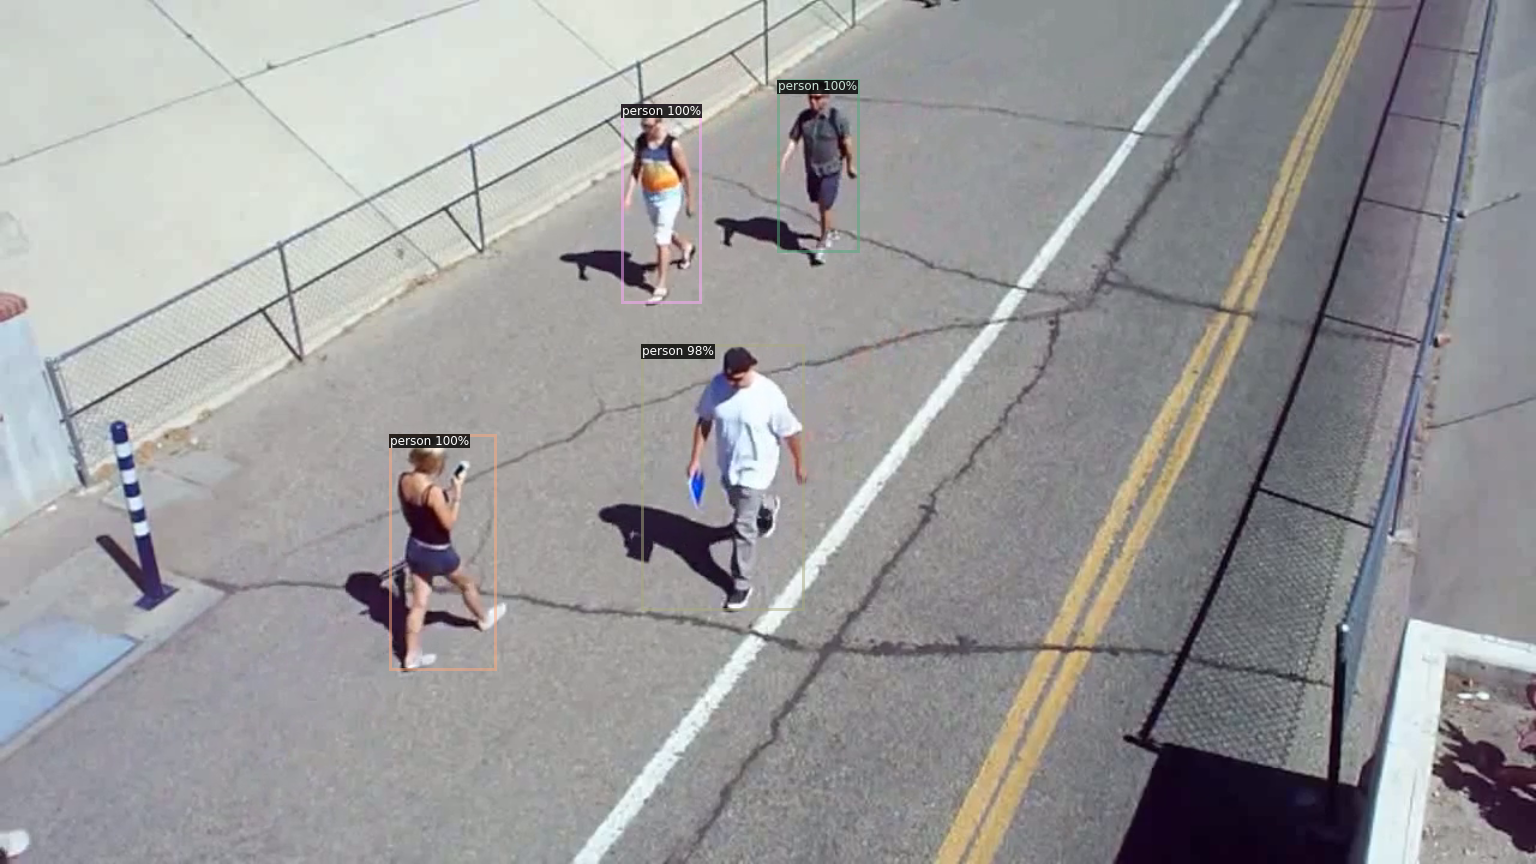

In [ ]:
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale = 1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
classes = outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 0 0 0]


In [ ]:
bbox = outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[324.84775  362.63168  412.2692   557.5951  ]
 [648.3272    67.84344  714.95404  209.5848  ]
 [518.50555   87.988556 583.1439   251.9453  ]
 [535.09247  288.19186  669.1547   507.51666 ]]


In [ ]:
ind = np.where(classes==0)[0]

person = bbox[ind]

num = len(person)
print(num)

4


In [ ]:
x1, y1, x2, y2 = person[0]
print(x1, y1, x2, y2)

324.84775 362.63168 412.2692 557.5951


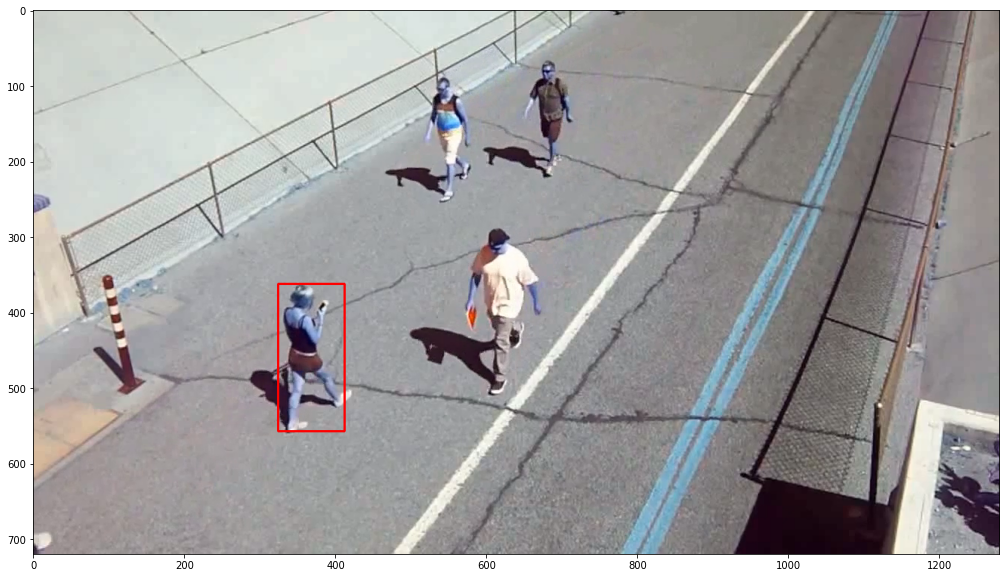

In [ ]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

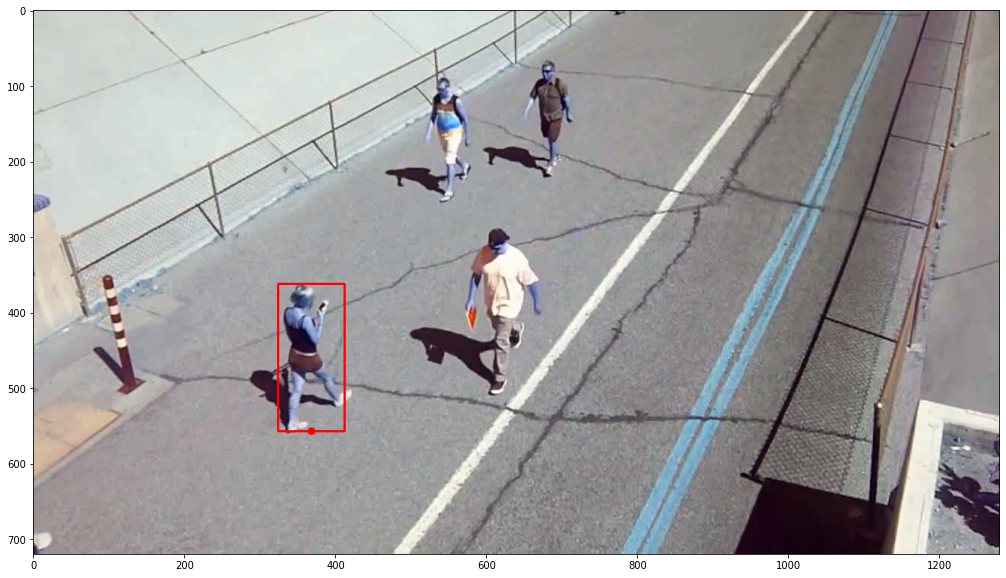

In [ ]:
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)

plt.figure(figsize = (20, 10))
plt.imshow(img)

In [ ]:
def mid_point(img,person,idx):
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

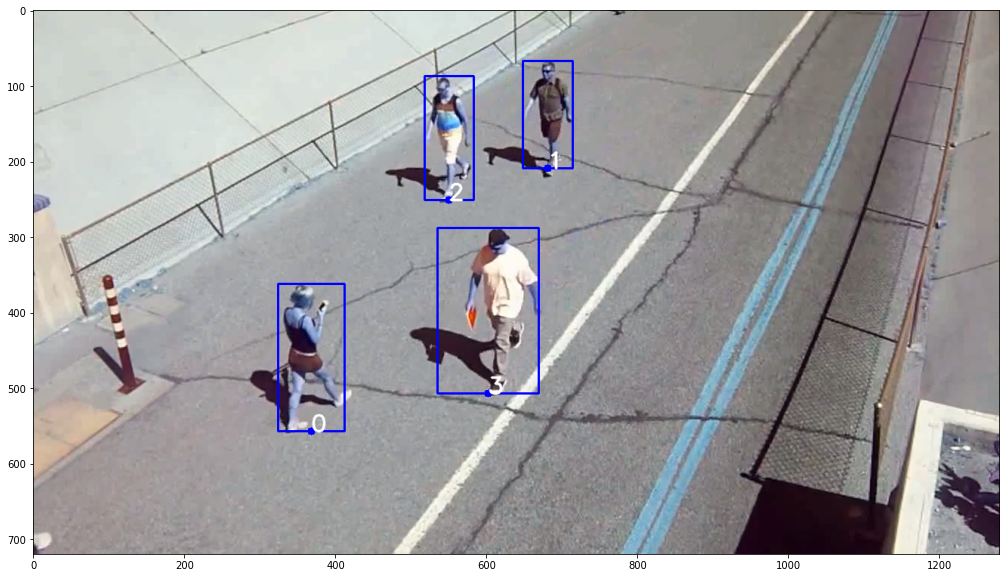

In [ ]:
midpoints = [mid_point(img,person,i) for i in range(len(person))]

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 58.8 ms, sys: 10 ms, total: 68.8 ms
Wall time: 70.2 ms


In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 30.5 µs


In [ ]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

Empty DataFrame
Columns: [p1, p2, dist]
Index: []

In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

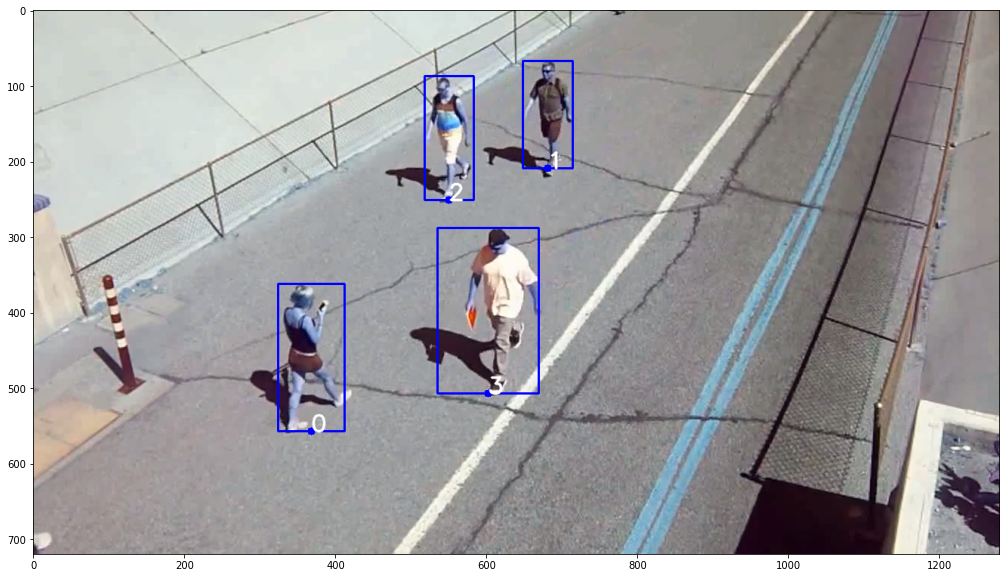

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [ ]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 479/479 [07:47<00:00,  1.03it/s]


In [ ]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    frame_array.append(img)

out = cv2.VideoWriter('vid_short_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)

for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()

CPU times: user 15 s, sys: 1.69 s, total: 16.7 s
Wall time: 16.3 s
